# Transactions Modelleri Algoritması

- Bu kısımda rastgele bir transactions verisini içeri alıp, time series modelini kurduk ve bunları algoritma haline getirdik. Ardından Flask ile entegre edip, canlıya aldık.

In [4]:
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from fbprophet import Prophet
import time

In [5]:
data = pd.read_excel('number2.xlsx', date_parser=[0])
data = data[data.Hizmet == "Alışveriş"]
data.drop(["CardNumber","Hizmet"],axis=1,inplace=True)
data.set_index("Date",inplace=True)
data.head()

,Prices
Date,
2018-02-28,56
2019-02-08,209
2019-02-27,47
2018-06-12,64
2018-01-24,197


In [6]:
data = dataMonth(data)
data

,Prices,Date
0,1164,2017-11-30
1,655,2017-12-31
2,805,2018-01-31
3,800,2018-02-28
4,880,2018-03-31
5,995,2018-04-30
6,955,2018-05-31
7,664,2018-06-30
8,1260,2018-07-31
9,1143,2018-08-31


In [7]:
data["Date"] = data.index
data.index = range(0,len(data))
data.head()

,Prices,Date
0,1164,0
1,655,1
2,805,2
3,800,3
4,880,4


In [8]:
df = data.rename(columns={'Date': 'ds',
                        'Prices': 'y'})

NameError: name 'plt' is not defined

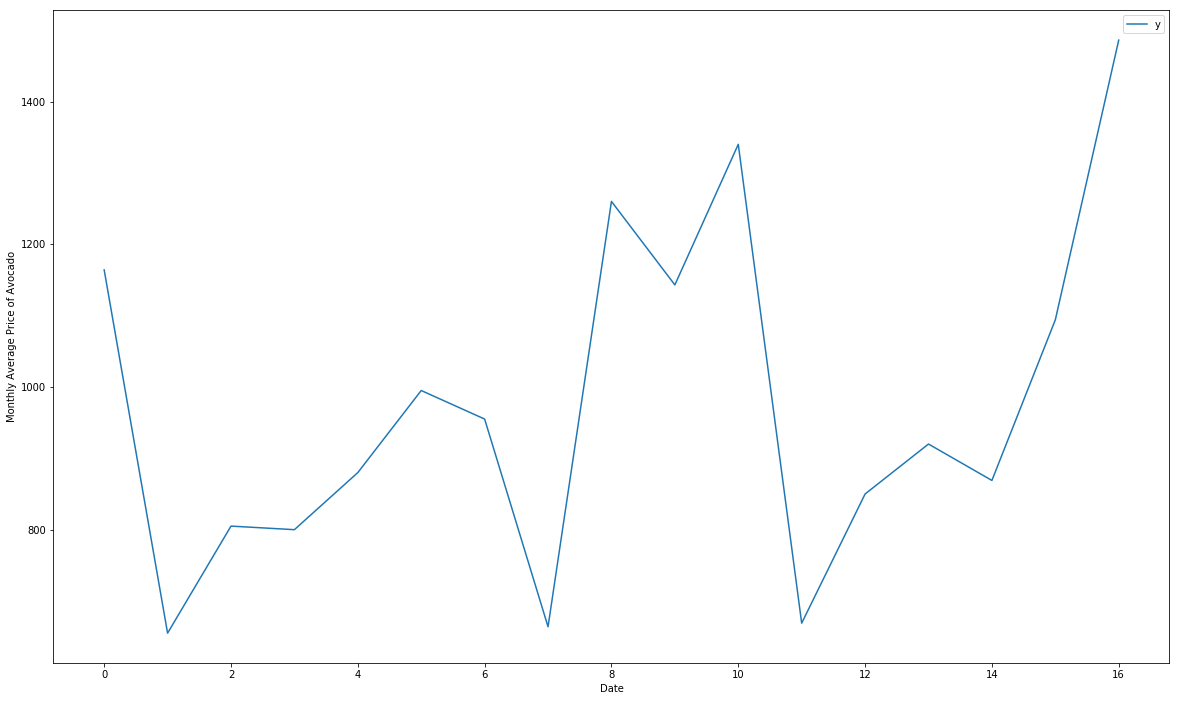

In [9]:
ax = df.set_index('ds').plot(figsize=(20, 12))
ax.set_ylabel('Monthly Average Price of Avocado')
ax.set_xlabel('Date')

plt.show()

In [10]:
my_model = Prophet()
my_model.fit(df)

future_dates = my_model.make_future_dataframe(periods=2, freq="M")
forecast =my_model.predict(future_dates)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 12.0.


ValueError: lam value too large

In [215]:
data

,Prices,Date
0,1164,2017-11-30
1,655,2017-12-31
2,805,2018-01-31
3,800,2018-02-28
4,880,2018-03-31
5,995,2018-04-30
6,955,2018-05-31
7,664,2018-06-30
8,1260,2018-07-31
9,1143,2018-08-31


In [216]:
forecastnew = forecast['ds']
forecastnew2 = forecast['yhat']
forecastnew = pd.concat([forecastnew,forecastnew2], axis=1)

forecastnew = forecastnew[len(forecastnew)-3:]

In [217]:
forecastnew

,ds,yhat
16,2019-03-31,1064.283999
17,2019-04-30,1077.160172
18,2019-05-31,1090.465551


In [218]:
data.set_index('Prices').Date

Prices
1164   2017-11-30
655    2017-12-31
805    2018-01-31
800    2018-02-28
880    2018-03-31
995    2018-04-30
955    2018-05-31
664    2018-06-30
1260   2018-07-31
1143   2018-08-31
1340   2018-09-30
669    2018-10-31
850    2018-11-30
920    2018-12-31
869    2019-01-31
1094   2019-02-28
1486   2019-03-31
Name: Date, dtype: datetime64[ns]

In [219]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
Prices    17 non-null int64
Date      17 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 352.0 bytes


In [220]:
c = list(forecastnew.ds.astype(str).values)
c1 = []
c1.append(data.Date.astype(str).values[-1])
for i in range(0,len(c)):
    c1.append(str(c[i]))

p = list(forecastnew.yhat.values)
p1 = []
p1.append(data.Prices.values[-1])
for i in range(0,len(p)):
    p1.append(p[i])

In [221]:
forecastnew = pd.DataFrame({"ds":c1, "yhat":p1})
forecastnew.ds = pd.to_datetime(forecastnew.ds)
forecastnew.yhat = forecastnew.yhat.astype(int)

## Bu kısımda maviler eğittimiz değerler, kırmızılar ise tahminlediğimiz değerler

Red = Predicted Values, Blue = Base Values


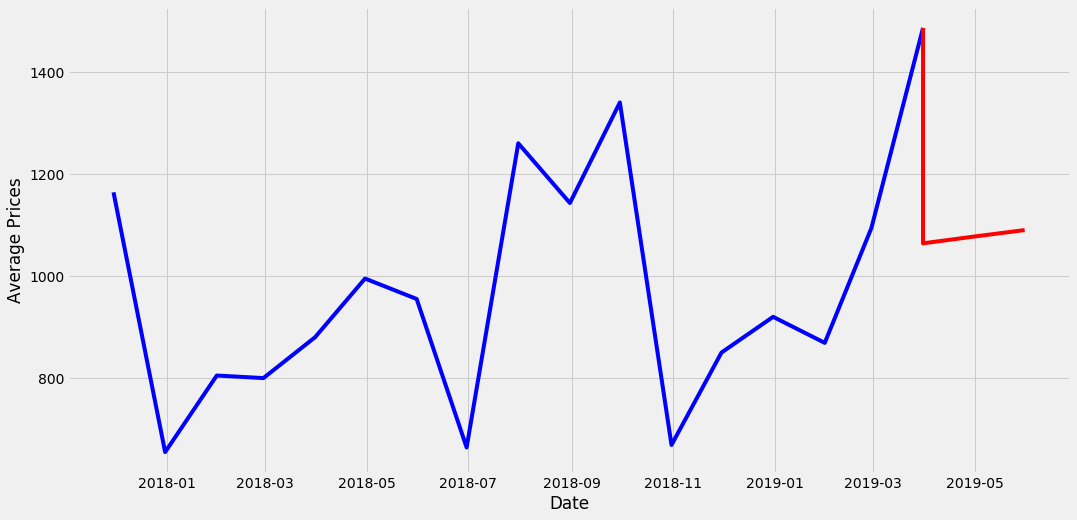

In [222]:
fig, ax1 = plt.subplots(figsize=(16, 8))
ax1.plot(data.set_index('Date').Prices, color='b')
ax1.plot(forecastnew.set_index('ds').yhat, color='r')
ax1.set_ylabel('Average Prices')
ax1.set_xlabel('Date')
print("Red = Predicted Values, Blue = Base Values")
